### ASTR-324, University of Washington
# Homework 1

## Problem 1

Write a Python function named `monty_play` that simulates the Monty Hall Problem. Play $N=10000$ games and print the fraction of wins if the player keeps their initial selection vs. if they choose to switch.

Extra credit: extend the function to work with any number of doors (not just 3).

# Solutions

### Some useful definitions and functions

In [58]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import seaborn as sea
import matplotlib.pyplot as plt

## Problem 1

In [59]:
def monty_hall(number_games, switch_door):
 
    # win counter
    win = 0
    
    # the prizes: one car, two goats
    prizes = ['Car', 'Goat1', 'Goat2']
    goat_prizes = prizes[1:3]
    
    #print(goat_prizes)
    #output: ['Goat1', 'Goat2']

    # play over number of games
    for i in range(number_games):
        
        # distribution of prizes to doors at random
        doors = np.random.choice(prizes, size = 3, replace = False)

        # player pick first_choice at random
        first_choice = np.random.randint(1,3)

        # scenario 1: when player does switch_door 
        if switch_door:
            if doors[first_choice] == 'Car':
                reveal = np.random.choice(goat_prizes, size = 1)
                reveal_door_position = np.where(doors == reveal)
            elif doors[first_choice] == 'Goat1':
                reveal_door_position = np.where(doors == 'Goat2')
            elif doors[first_choice] == 'Goat2':
                reveal_door_position = np.where(doors == 'Goat1')
                
            # player final_choice: delete first_choice and switches to remaining door along the axis[0]
            final_choice = np.delete(doors, [first_choice, int(reveal_door_position[0])])

        # scenario 2: when player does not switch_door
        elif not switch_door:
            
            # player final_choice: stay with first_choice
            final_choice = doors[first_choice]

        # determine whether player has won based on final_choice
        if final_choice == 'Car':
            win = win + 1
        
    # return win count and frequency        
    return win, win/number_games

In [60]:
number_games = 10000
np.random.seed(123)
switch_count,switch_frequency = monty_hall(number_games, switch_door=True)
no_switch_count,no_switch_frequency = monty_hall(number_games, switch_door=False)

In [61]:
results = pd.DataFrame({'Winning_percentage': [switch_frequency * 100, no_switch_frequency * 100],'Switch_door': ['True', 'False']})

results['Switch_door'] = results['Switch_door'].map({'True': 'Player does switch_door','False': 'Player does not switch_door'})

results

,Winning_percentage,Switch_door
0,66.29,Player does switch_door
1,33.27,Player does not switch_door


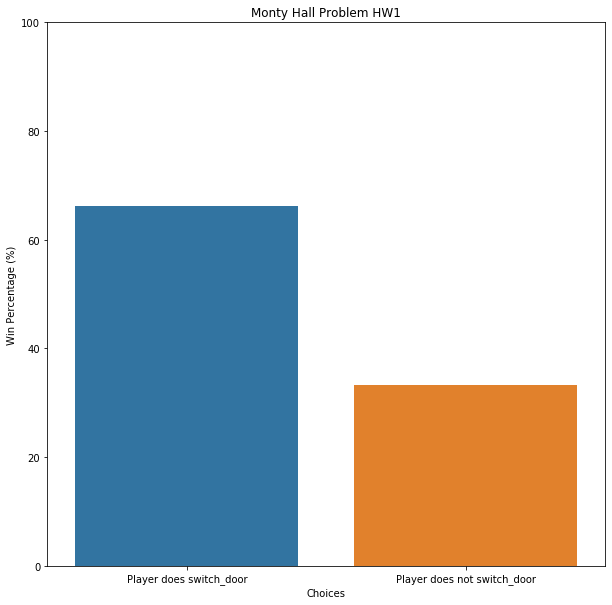

In [62]:
fig = plt.figure(1, figsize = (10,10))
ax = sea.barplot(data = results.melt(id_vars=['Switch_door']), y ='value', x = 'Switch_door')
ax.set(ylim = (0, 100), ylabel = ('Win Percentage (%)'), xlabel = ('Choices'), title = ('Monty Hall Problem HW1'))
plt.show()

In [63]:
total_probability = switch_frequency * 100 + no_switch_frequency * 100
print(total_probability) # I am not getting it to add up to 100. Might be something to do with np.random.seed(123). I am also getting the same probability every time I run the code.

99.56
